<a href="https://colab.research.google.com/github/nazihkalo/FIFA19-Scouting-Analysis/blob/master/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime

# Maps
import geopandas as gpd

from math import pi

In [0]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Read Data

In [0]:
fifa = pd.read_csv('/Users/nazihkalo/Desktop/UChicago_Analytics/Quarter 2/Data Mining/final project/data.csv')

In [0]:
# Copy of the dataframe
original_fifa = fifa.copy()

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
#Checking dataset for NA values
fifa.isnull().sum().sort_values(ascending = False)

Loaned From                 16943
LWB                          2085
LM                           2085
CB                           2085
LCB                          2085
LB                           2085
RDM                          2085
CDM                          2085
LDM                          2085
RM                           2085
RCM                          2085
CM                           2085
LCM                          2085
RAM                          2085
RB                           2085
CAM                          2085
LAM                          2085
RW                           2085
RF                           2085
CF                           2085
LF                           2085
LW                           2085
RS                           2085
ST                           2085
LS                           2085
RCB                          2085
RWB                          2085
Release Clause               1564
Joined                       1553
Contract Valid

# Feature Engineering

In [0]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

#Create float Value column
fifa['Value_float'] = fifa['Value'].apply(value_to_int)

#Create float Wage Column
fifa['Wage_float'] = fifa['Wage'].apply(value_to_int)

print(fifa['Value_float'].head())
print(fifa['Wage_float'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value_float, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage_float, dtype: float64


## Create Position Group

In [0]:
#Define position groups
forwards = ['RF', 'ST', 'LW','LF', 'RS', 'LS', 'RW', 'CF' ]
defenders = ['RCB','CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
mids = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
gk = ['GK']

#Create Function to apply to df
def label_position(row):
    if row['Position'] in forwards:
        return 'Forward'
    if row['Position'] in defenders:
        return 'Defender'
    if row['Position'] in mids:
        return 'Midfielder'
    if row['Position'] in gk:
        return 'GoalKeeper'
    return 'Other'

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'].astype('category', inplace = True)

0           Forward
1           Forward
2           Forward
3        GoalKeeper
4        Midfielder
5           Forward
6        Midfielder
7           Forward
8          Defender
9        GoalKeeper
10          Forward
11       Midfielder
12         Defender
13       Midfielder
14       Midfielder
15          Forward
16          Forward
17       Midfielder
18       GoalKeeper
19       GoalKeeper
20       Midfielder
21          Forward
22       GoalKeeper
23          Forward
24         Defender
25       Midfielder
26       Midfielder
27       Midfielder
28       Midfielder
29          Forward
30          Forward
31       Midfielder
32          Forward
33       Midfielder
34         Defender
35         Defender
36          Forward
37       GoalKeeper
38          Forward
39         Defender
40       GoalKeeper
41       GoalKeeper
42         Defender
43          Forward
44         Defender
45       Midfielder
46       GoalKeeper
47          Forward
48          Forward
49         Defender


In [0]:
fifa['Position_Group'].value_counts()

Midfielder    6838
Defender      5866
Forward       3418
GoalKeeper    2025
Other           60
Name: Position_Group, dtype: int64

## Create club reputation column

In [0]:
#Clubs sorted by internation Reputation
clubs_rep = fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

clubs_rep.head(10)

,International Reputation
Club,
FC Barcelona,74.0
FC Bayern München,73.0
Chelsea,70.0
Manchester United,69.0
Manchester City,69.0
Real Madrid,69.0
Arsenal,67.0
Paris Saint-Germain,67.0
Borussia Dortmund,66.0


In [0]:
#Add club reputation column
fifa['Club_Reputation'] =  fifa['International Reputation'].groupby(fifa['Club']).transform('sum')

fifa[['Club','Club_Reputation']].head(10)

,Club,Club_Reputation
0,FC Barcelona,74.0
1,Juventus,63.0
2,Paris Saint-Germain,67.0
3,Manchester United,69.0
4,Manchester City,69.0
5,Chelsea,70.0
6,Real Madrid,69.0
7,FC Barcelona,74.0
8,Real Madrid,69.0
9,Atlético Madrid,62.0


# Exploratory Data Analysis 

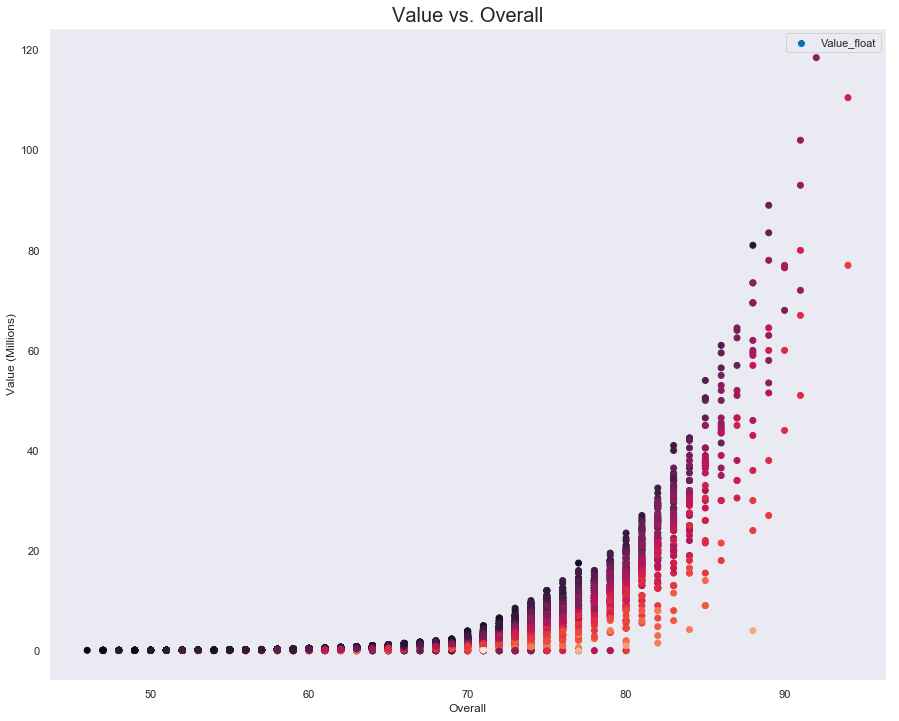

In [0]:
# Value vs. Overall
value = fifa.Value_float

position_category = fifa['Position'].astype('category')

fig = plt.figure(figsize= (15,12))


plt.scatter(x = 'Overall', y = value  / 1000000 , c = 'Age', data = fifa)

plt.ylabel('Value (Millions)')
plt.xlabel('Overall')
plt.title('Value vs. Overall', fontsize = 20)
plt.legend()

<Figure size 1080x864 with 0 Axes>

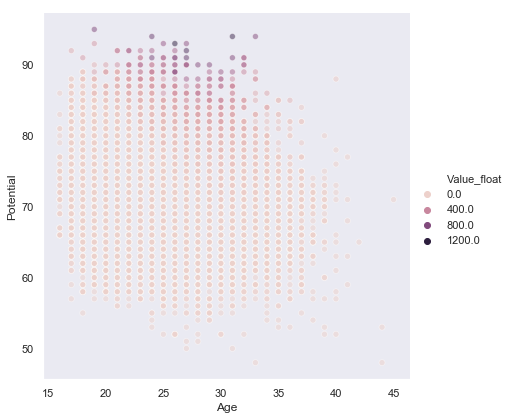

In [0]:
# Relation potential and age with respected value of players
plt.figure(figsize = (15,12))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=fifa);

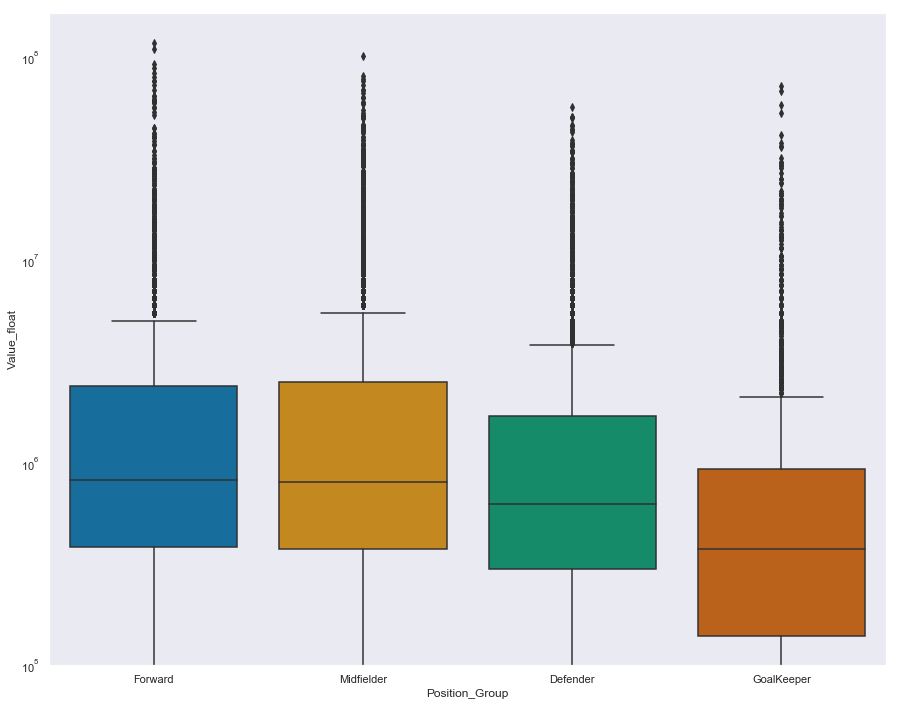

In [0]:

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))
ax.set_yscale("log")

sns.boxplot(x= 'Position_Group', y= 'Value_float', data = fifa, 
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])


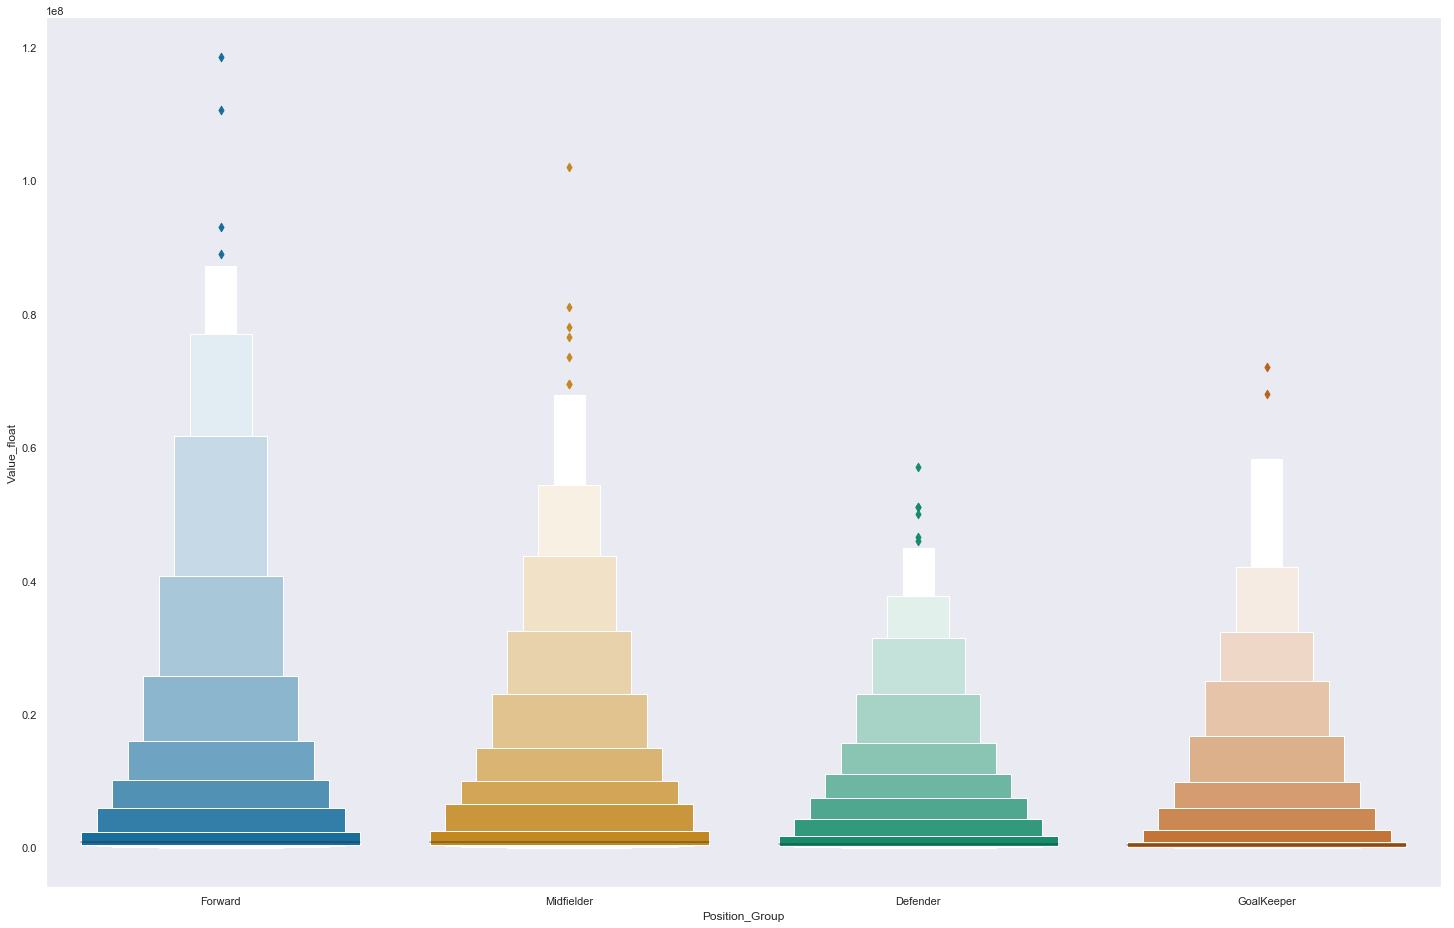

In [0]:
sns.boxenplot(x= 'Position_Group', y= 'Value_float', data = fifa, scale = 'linear',
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])


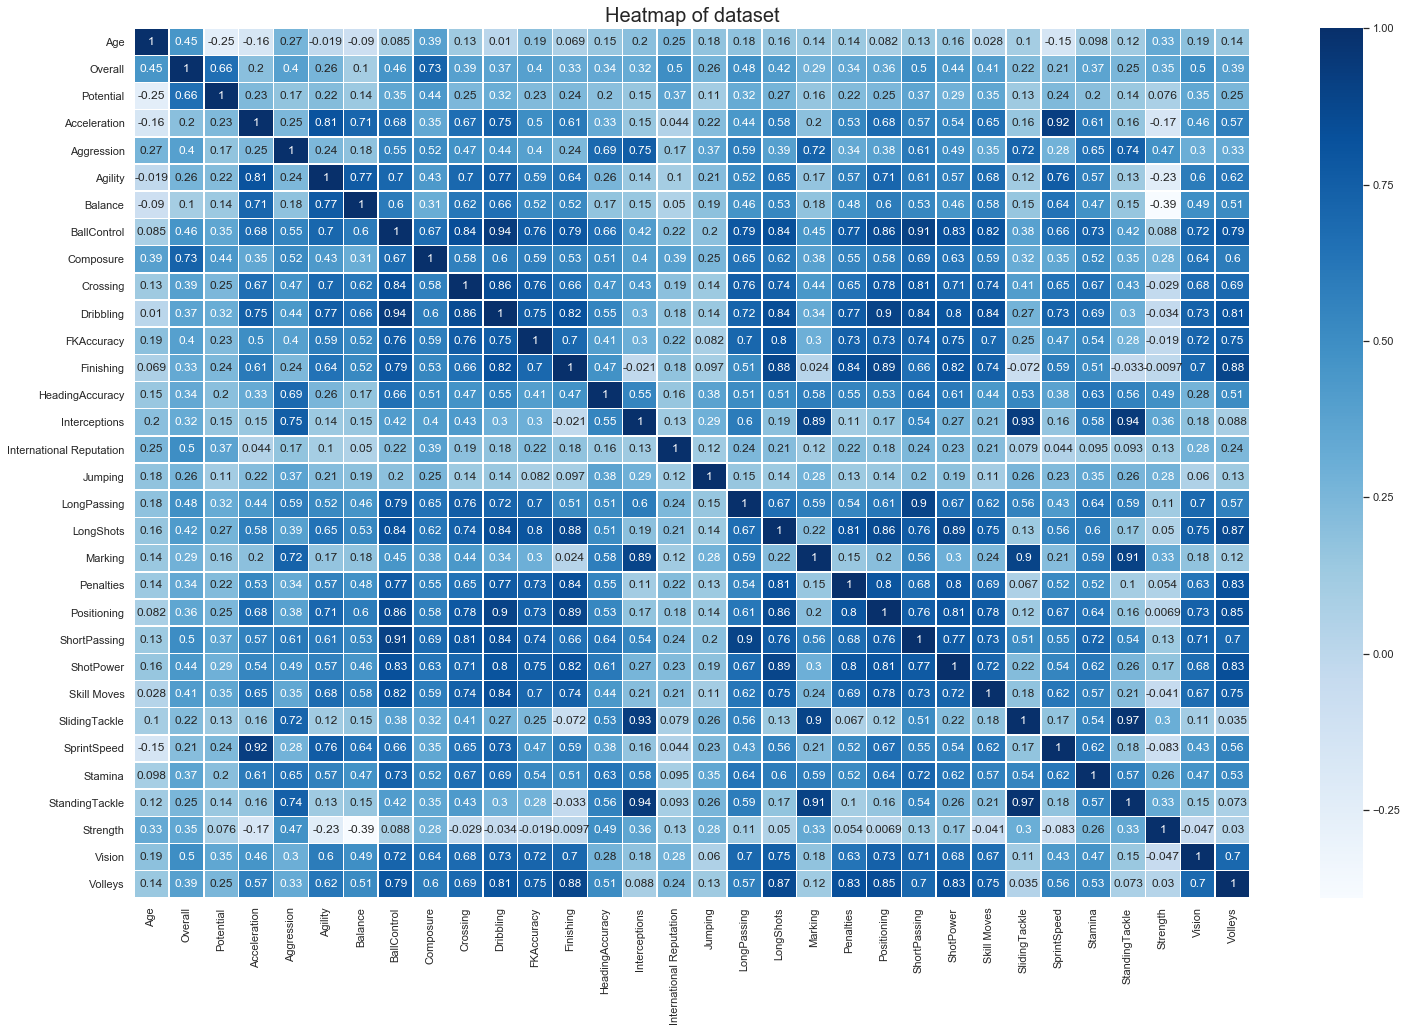

In [0]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

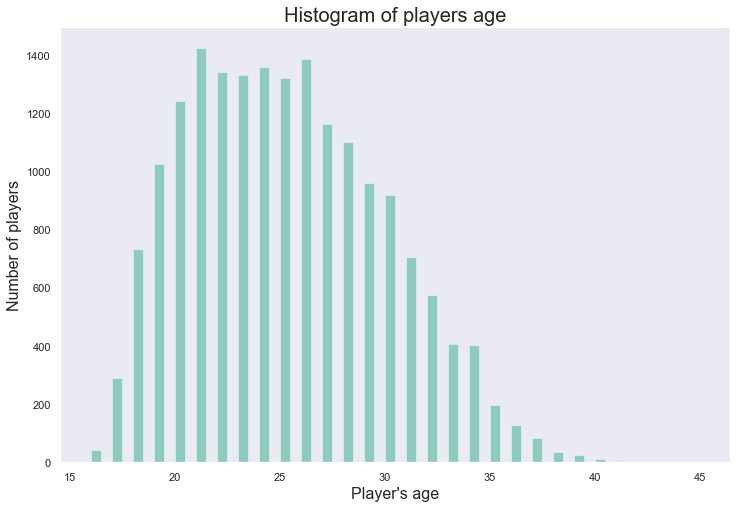

In [0]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = fifa.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

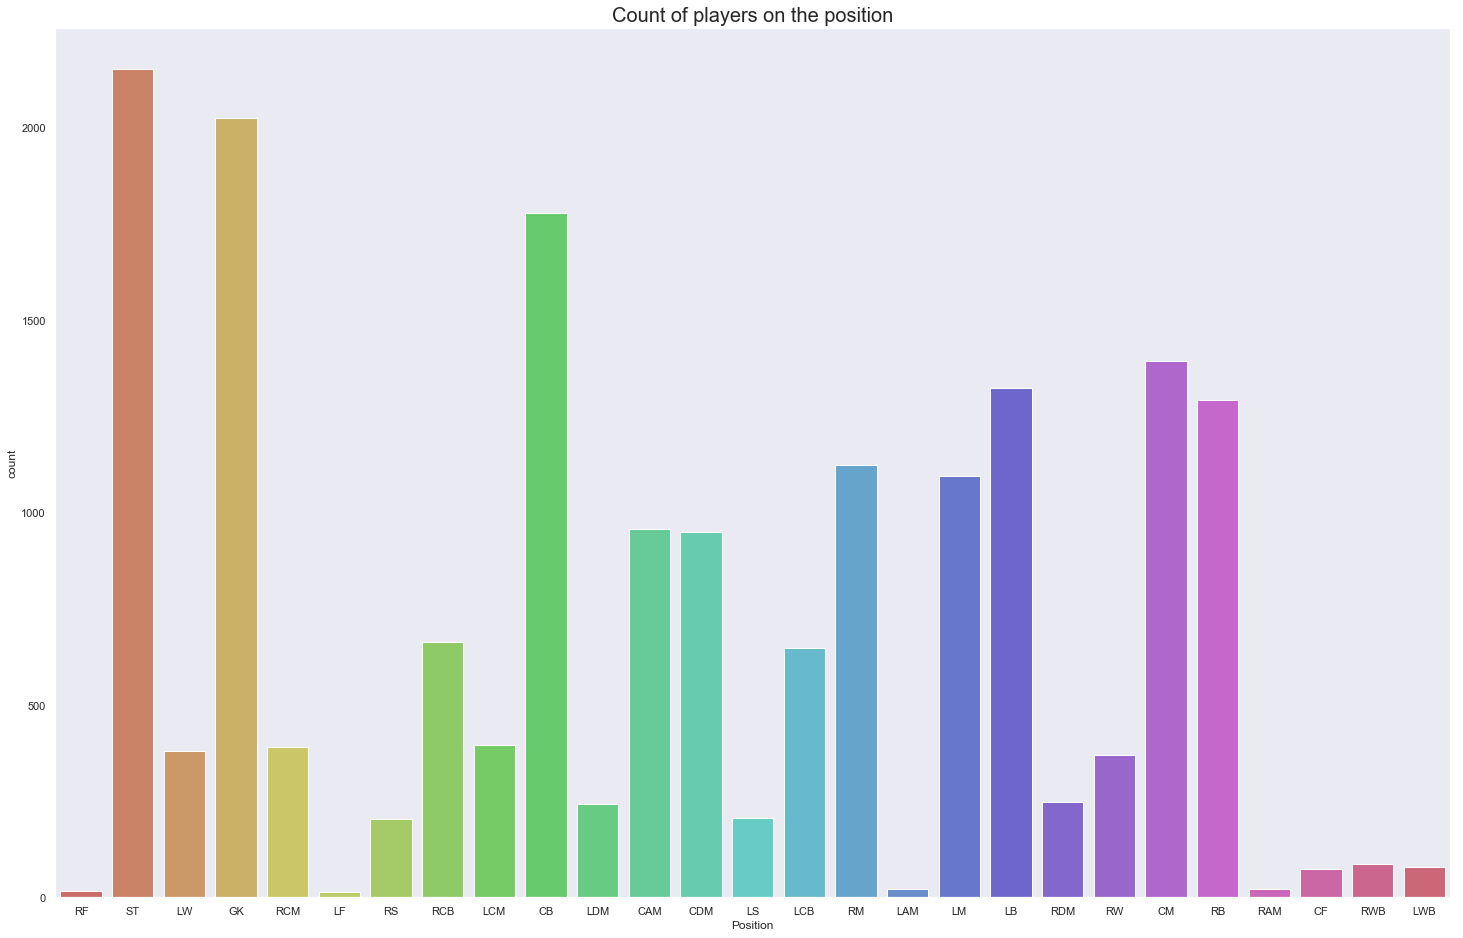

In [0]:
# All of position
ax = sns.countplot(x = 'Position', data = fifa, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

# Clustering

In [0]:
numeric_fifa = fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

#Limit to only popular clubs (reputation over 45)
numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


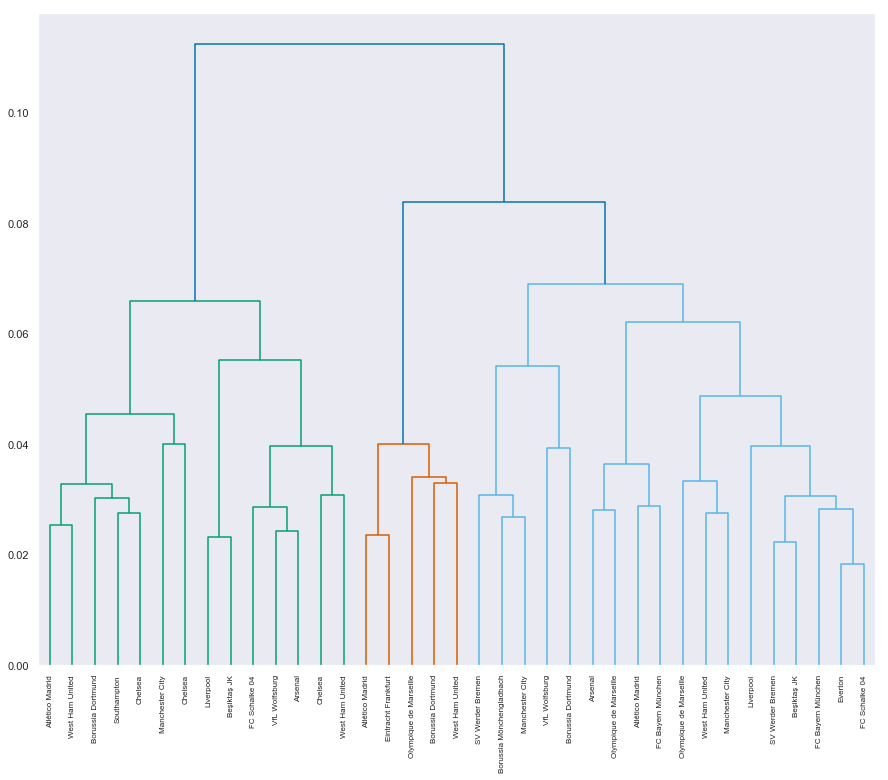

In [0]:
# Any Pre-processing needed?
normalized_numeric = normalize(numeric_values)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=club_labels,
    leaf_rotation=90.,
    leaf_font_size=8)


plt.show()

In [0]:
fifa.Club.nunique()

651

In [0]:
fifa.Club.value_counts()

Borussia Dortmund                33
Rayo Vallecano                   33
Fortuna Düsseldorf               33
Atlético Madrid                  33
Empoli                           33
Wolverhampton Wanderers          33
Everton                          33
Burnley                          33
Eintracht Frankfurt              33
Arsenal                          33
Southampton                      33
FC Barcelona                     33
Frosinone                        33
Tottenham Hotspur                33
Liverpool                        33
Cardiff City                     33
TSG 1899 Hoffenheim              33
Manchester United                33
RC Celta                         33
AS Monaco                        33
CD Leganés                       33
Real Madrid                      33
Newcastle United                 33
Manchester City                  33
Valencia CF                      33
Chelsea                          33
Villarreal CF                    32
Fulham                      

In [0]:
fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

,International Reputation
Club,
FC Barcelona,74.0
FC Bayern München,73.0
Chelsea,70.0
Manchester United,69.0
Manchester City,69.0
Real Madrid,69.0
Arsenal,67.0
Paris Saint-Germain,67.0
Borussia Dortmund,66.0
